# MTH9875 Homework 2

Assigned: September 8, 2017.
Due: September 21, 2017 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

* **Author: Hongchao Pan**
* Kernel Version: R 3.3.2
* Packages/Libraries: repr
* Notes:
    

In [1]:
# Loading libraries
library(repr) # For changing plot features
# Record the total running time of this notebook
# Starting record the time
ptm<-proc.time()

### The  volatility smile in a simple regime-switching model

#### 1. (10 points) 

Consider the simple regime-switching model from Lecture 2 where realized volatility over a one-year period can be either $10\%$ or $30\%$, each with probability $1/2$ (depending on an initial coin toss say).  The density of 1-year returns is given by the sum of the two corresponding normal densities:

In [2]:
d3010 <- function(x){(dnorm(x,sd=.1)+dnorm(x,sd=.3))/2}

The following snippet loads Black-Scholes functions from Lecture 1.  Please use these in your solution.

In [3]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/09/9875HW2.zip", destfile="9875HW2.zip")
unzip(zipfile="9875HW2.zip")

source("BlackScholes.R")

(a) Code a function to return the price of a 1-year European option with log-strike $k$ in this model.  Your function should return the price as a fraction of the current stock price.

(b) Code a function to return the implied volatility 1-year European option with log-strike $k$ in this model.

(c) Draw the 1-year volatility smile in this model for log-strikes from -$2.0$ to $2.0$ with implied volatility on the y-axis and log-strike on the x-axis.  

(d) What is implied volatility at-the-money?  Give intuition as to why.

(e) In the extreme wings of the volatility smile, implied volatility tends to $30\%$.  Why?

### Answer of Q1

#### Answer of (a): Fuction of a 1-year European option with log-strike $k$.

* The definition of log-strike $k$ is:


$$k = \log \left( \frac{K}{F_T } \right)$$


where 
    $ F_T  = S_0 \,\exp \left\{\int_0^T\,\mu_t\,dt \right \} $ is the forward price. And K is strike.

* Assume $\mu_t=0$, we have:

$$
K=S_0 \exp\{k\}
$$

In [4]:
# Define a function to return the fraction of option price w.r.t. current price S0.
# The input of BSFormula o BSFormulaPut is: S0, K, T, r, sigma

In [5]:
# Define the function
Euro_Option<-function(k, S0, opt_flag){
    # Opt_flag: CALL or PUT
    K <- S0*exp(k) # Strike
    
    if (toupper(opt_flag) == "CALL"){
        # Call option
        return (0.5*BSFormula(S0 = S0,K = K,T = 1,r = 0,sigma = 0.1)+
               0.5*BSFormula(S0=S0,K=K,T=1,r=0,sigma = 0.3))
    }
    else{
        # Put option
        return (0.5*BSFormulaPut(S0 = S0,K = K,T = 1,r = 0,sigma = 0.1)+
               0.5*BSFormulaPut(S0=S0,K=K,T=1,r=0,sigma = 0.3))
    }   
}


#### Answer of (b): Corresponding implied vol function

In [6]:
Euro_imp_vol <- function(k, S0, opt_flag){
    price <- Euro_Option(k, S0, opt_flag)
    K <- S0*exp(k)
    if(toupper(opt_flag) == "CALL"){
        return (BSImpliedVolCall(S0,K,T = 1,r = 0,C = price))
    }
    else{
        # Put
        return(BSImpliedVolPut(S0,K,T = 1,r = 0,C=price))
    }
}

#### Answer of (c): Draw the 1-year volatility smile in this model for log-strikes from $- 2.0$  to $ 2.0$  with implied volatility on the y-axis and log-strike on the x-axis.

In [7]:
# Assign the current stock price with a random number of uniform distribution between 90 and 100
S0 <- runif(1,90,100) # Retrun 1 random number between 90 and 100. End points cannot be reached.
S0

[1] 91.36531

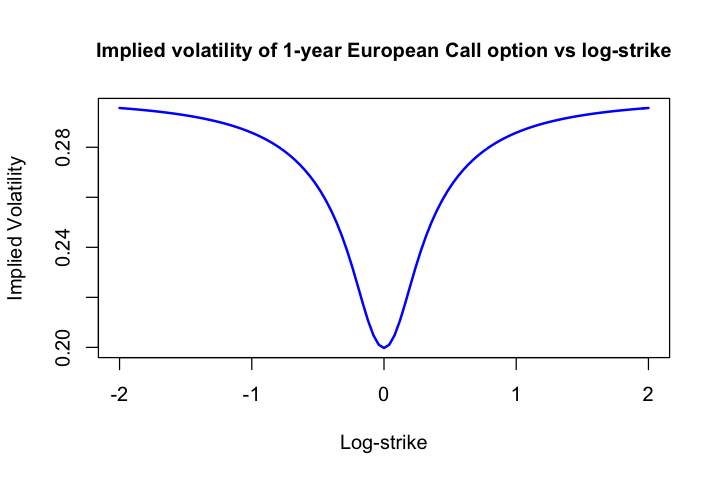

In [8]:
options(repr.plot.height=4, repr.plot.width=6)
curve(Euro_imp_vol(x, S0,"CALL"),from = -2, to= 2, xlab="Log-strike",
      ylab="Implied Volatility",
      main="Implied volatility of 1-year European Call option vs log-strike",
     cex.main=1, lwd=2, col="blue")

#### Answer of (d): What is implied volatility at-the-money?  Give intuition as to why.

In [9]:
# ATM implied vol when log-strike k=0
cat("The ATM implied volatility is: ", format(Euro_imp_vol(0,S0,"Call"),digits = 6),"\n")

The ATM implied volatility is:  0.19975 


* As we know, the ATM European call price has fomula by:

$$
C_{ATM} \sim 0.4 \sigma S_0\sqrt{\tau}
$$

which indicates that the European option price can be approximated by a linear function of volatility.

* The realized volitility can be either 10% or 30% with equal probability, then the expected realized volatility is 20%.

* Therefore, in regime-switching model, the implied volatility is approximately the expectation of realized volatility, i.e., 20% (19.98% in our example).

#### Answer of (e): In the extreme wings of the volatility smile, implied volatility tends to  30% . Why?

* From the figure in (c), we can see that the implied volatility tends to 30% if $k$ is very large (2) or very small (-2).

* When $k$ is very large, based on the equation in (a), $K$ is very large. Then the European call option is deep out of the money and the option price is mainly contribued by the right tail region. Since the tail region is driven by the high volatility, the implied volatility tends to 30%.

* Similar when $k$ is very small. $K$ is very small. Then the European put option is deep out of the money. By the same reason, implied volatility tends to 30%.

* Therefore, implied volatility tends to 30% in the extreme wings of the volatility smile.

### Tanaka's formula
$$\newcommand{\supp}{\mathrm{supp}}
\newcommand{\EE}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
#### 2. (6 points)

By applying Itô's lemma as in the notes, prove Tanaka's formula in its usual form:

$$
\left|B_t\right|=\int_0^t\,\sgn(B_s)\,dB_s+L_t
$$
where $B_t$ is a standard Brownian motion, $\sgn$ denotes the sign function

$$
\sgn(x)=\left\{
\begin{array}{ll}
  +1&x \ge 0  \\
 -1 & x <0 
\end{array}
\right.
$$

and $L_t$ is its local time at $0$ (roughly the time spent by $B$ at $0$ before time $t$) given by the formal expression

$$
L_t=\int_0^t\,\delta(B_s)\,ds.
$$

Explain in words what this result means in terms of delta-hedging of a particular options position.


### Answer of Q2

* By using the notation in the lecture, we can re-write $|B_t| = B_t^+ + (-B_t)^+$

* Tanaka's formula is defined by $ d\left( {S_t-K} \right)^+=\theta \left( {S_t-K}
\right)\,dS_t+\frac{1}{2}\,v_t\,S_t^2\,\delta \left( {S_T-K}
\right)\,dt $

* Compare the two formula, we have:

$$
d(B_t)^+ = \theta(B_t)dB_t + \frac{1}{2}\delta(B_t)dt\ 
$$

and

$$
d(-B_t)^+ = -\theta(-B_t)dB_t+\frac{1}{2}\delta(-B_t)dt = -\theta(-B_t)dB_t + \frac{1}{2}\delta(B_t)dt
$$

* Therefore, by applying Ito's lemma, we have:

$$
\begin{align}
d|B_t| &= d(B_t^+ + (-B_t)^+) = \theta(B_t)dB_t - \theta(-B_t)dB_t + \delta(B_t)dt \\
&= (\theta(B_t)-\theta(-B_t))dB_t + \delta(B_t)dt \\
&= \sgn(B_t)dB_t + \delta(B_t)dt \\
\end{align}
$$

* Integrate the formula, we have:

$$
\begin{align}
|B_t| &= \int_0^t  \sgn(B_s)dB_s + \int_0^t \delta(B_s)ds \\
&= \int_0^t \sgn(B_s)dB_s + L_t
\end{align}
$$

* As $|B_t| = B_t^+ + (-B_t)^+$, $|B_t|$ represents a straddle with $K=0$.

* The formula above represents a hedging strategy $\int_0^t \sgn(B_s)dB_s$ plus a local time $L_t$

* The hedging strage is: 
    * Long one unit of the underlying asset when it is positive.
    * And short one unit of the underlying asset when it is negative.

## Local volatility and implied volatility

#### 3. (6 points) 

Using the BBF formula, prove the well-known rule of thumb that the local volatility skew is roughly twice the implied volatility skew for short expirations.  Formally, for small $T$,

$$
\left.\partial_k \sigma(k,T)\right|_{k=0} \approx 2\, \left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}.
$$

### Answer of Q3

* From lecture, we have: $\sigma_{BS}(k,T)=\sigma_0(k)+\mathcal{O}(T)$.

* For small $T$, $\sigma_{BS}(k,T) \approx \sigma_0(k) = \frac{k}{\int_0^k\,\frac{dy}{\sigma(y,0)}}$

* Take derivative on both sides, we have:

$$
\begin{eqnarray}
\left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}&\approx&\left.\frac{\int_0^k\frac{dy}{\sigma(y,T)}-\frac{k}{\sigma(k,T)}}{\left(\int_0^k\frac{dy}{\sigma(y,T)}\right)^2}\right|_{k=0}\\
&=&\left.\frac{\frac{1}{\sigma(k,T)}- \frac{\sigma(k,T)- k \partial_k \sigma(k,T)}{\sigma^2(k,T)}} {2\int_0^k\frac{1}{\sigma(k,T)}\frac{dy}{\sigma(y,T)}}\right|_{k=0}\\
&=&\left.\frac{\frac{k}{\sigma(k,T)}\partial_k \sigma(k,T)}{2\int_0^k\frac{dy}{\sigma(y,T)}}\right|_{k=0}\\
&=&\left.\frac{\frac{1}{\sigma(k,T)}\partial_k \sigma(k,T)-\frac{k}{\sigma^2(k,T)}\left(\partial_k \sigma(k,T)\right)^2+\frac{k}{\sigma(k,T)}\frac{\partial^2 \sigma(k,T)}{\partial k^2}}{\frac{2}{\sigma(k,T)}}\right|_{k=0}\\
&=&\left.\frac{1}{2}\partial_k \sigma(k,T)\right|_{k=0}
\end{eqnarray}
$$

* Therefore, for small T, we have:

$$
\left.\partial_k \sigma(k,T)\right|_{k=0} \approx 2\, \left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}.
$$

#### 4. (6 points) 

Consider formula (12) from Lecture 2:

$$
v_\ell(k,T) = \frac{\frac{\partial w}{\partial T}}
{\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }}.
$$

Using this formula, show that the simple quadratic parameterization

$$
w(k,T)=\alpha(T)+\beta(T)\,{k}+\gamma(T)\,{k^2}
$$

with $\alpha(T)>0$ and $\gamma(T)>0$ is arbitrageable.  Explain your result in words in terms of option strategies.

### Answer of Q4

* Simple quadratic parameterization has following:

$$
\frac{\partial w}{\partial k}=\beta(T)+2\gamma(T)k\\
\frac{\partial^2 w}{\partial^2 k}=2\gamma(T)
$$

* Denote 
$$
f(k)= \left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }
$$

* Then we have:

\begin{eqnarray}
f(k)&=&\left(1-\frac 12\frac{k}{w}\left(\beta(T)+2\gamma(T)k\right)\right)^2-\frac14\left(\frac14+\frac{1}{w}\right)\left(\beta(T)+2\gamma(T)k\right)^2+\gamma(T)\\
&=&\left(1-\frac 12\frac{k}{w}\left(\beta(T)+2\gamma(T)k\right)\right)^2-\frac{1}{16}\left(\beta(T)+2\gamma(T)k\right)^2-\frac{1}{4w}\left(\beta(T)+2\gamma(T)k\right)^2+\gamma(T)\\
\end{eqnarray}

* When $k$ is very large, $f(k)$ is dominated by the 2nd term. Then:
$$
f(k)=\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }<0.
$$

* From lecture notes, we have:
\begin{eqnarray*}
\frac{\partial C}{\partial k} &=& 
\frac{\partial C_{BS}}{\partial k} + \frac{\partial C_{BS}}{\partial w}\,\frac{\partial w}{\partial k} \nonumber\\
\frac{\partial ^2 C}{\partial k^2 } &=& 
\frac{\partial^2 C_{BS} }{\partial k^2 } + 2\,\frac{\partial ^2 C_{BS} }{\partial k \partial w}\,
\frac{\partial w}{\partial k} + \frac{\partial^2 C_{BS} }{\partial w^2}\,
\left( \frac{\partial w}{\partial k} \right)^2
+ \frac{\partial C_{BS} }{\partial w}\,\frac{\partial ^2 w}{\partial k^2 } \nonumber
\end{eqnarray*}


* Since $k=\log(K/F_t)$, following property eixsts:
$$\frac{\partial k}{\partial K}=\frac{1}{K}=\frac{e^{-k}}{F_t}$$

* Therefore:
$$
\frac{\partial C}{\partial K}=\frac{\partial C}{\partial k}\frac{e^{-k}}{F_t}
$$

* From equation (11) in lecture notes #2, we have:
\begin{eqnarray}
\frac{\partial ^2 C_{BS} }{\partial w^2 } &=&
\left(  - \frac{1}{8} - \frac{1}{2\,w} + \frac{k^2}{2\,w^2} \right)\,
\frac{\partial C_{BS} }{\partial w} \nonumber\\
\frac{\partial ^2 C_{BS}}{\partial k \partial w}
&=& \,\left(  \frac{1}{2} - \frac{k}{w}\right)\,
\frac{\partial C_{BS}}{\partial w}\nonumber\\
\frac{\partial ^2 C_{BS} }{\partial k^2 } -\frac{\partial C_{BS} }{\partial k} 
&=& 2\,\frac{\partial C_{BS} }{\partial w}
\end{eqnarray}

* Therefore, substitute back we have:

\begin{eqnarray*}
\frac{\partial^2 C}{\partial K^2}&=&\left(\frac{\partial^2 C}{\partial k^2}-\frac{\partial C}{\partial k}\right)\frac{e^{-k}}{F_t}\\
&=&\left(-\frac{\partial C_{BS} }{\partial k} +
\frac{\partial ^2 C_{BS} }{\partial k^2 } - \frac{\partial
C_{BS} }{\partial w}\,\frac{\partial w}{\partial k} + 2\,\frac{\partial ^2 C_{BS} }{\partial k\, \partial w}\,\frac{\partial w}{\partial k} +\frac{\partial ^2 C_{BS}}{\partial w^2 }\,\left( \frac{\partial w}{\partial k} \right)^2 + \frac{\partial C_{BS}}{\partial w}\,\frac{\partial^2 w}{\partial k^2 }\right)\frac{e^{-k}}{F_t}\\
&=&2\frac{\partial C_{BS}}{\partial w}f(k)\frac{e^{-k}}{F_t}\\
&=&\frac{f(k)}{\sqrt{2\pi w}}e^{-\frac{d_2^2}{2}}<0
\end{eqnarray*}

with $d_2$ came from Black Scholes formula

* From above, we can see an arbitrage exists. A butterfly arbitrage can be constructured as following:

    * Long 1 unit call option with strike at $K-\delta K$
    * Short 2 units call options with strike at $K$
    * Long 1 unit call option with strike at $K+\delta K$

* Then:
    * At time 0: you can construct the portfolio as $C(K-\delta K)-2C(K)+C(K+\delta K)<0$
    * At maturity: the payoff is at least 0


In [10]:
# End recording the running time
print('The running time of this notebooks is: ')
proc.time()-ptm

[1] "The running time of this notebooks is: "


   user  system elapsed 
  0.368   0.024   0.562 